In [2]:
#import libraries 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# loading the dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
#Normalize the pixel values 
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255 
x_train_normalized.shape
#x_test_normalized

(60000, 28, 28)

In [5]:
#desired_input_shape = 784 
x_train_desired_normalized = x_train_normalized.reshape(x_train_normalized.shape[0], x_train_normalized.shape[1] * x_train_normalized.shape[2])  
x_test_desired_normalized = x_test_normalized.reshape(x_test_normalized.shape[0], x_test_normalized.shape[1] * x_test_normalized.shape[2])  
x_train_desired_normalized.shape
#x_test_desired_normalized[10].shape

(60000, 784)

In [6]:
#One-Hot Encode 
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(60000, 10))

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(x_train_normalized.shape[1] * x_train_normalized.shape[2],)))
model.add(tf.keras.layers.Dense(
    units=128, 
    activation='relu',
    name="layer_1" 
    ))
model.add(tf.keras.layers.Dense(
    units=64, 
    activation='relu',
    name="layer_2" 
    ))
model.add(tf.keras.layers.Dense(
    units=10, 
    activation='softmax',
    name="layer_output" 
    ))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_output (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile/Define Loss and Optimizer
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
            )

In [10]:
#Train the model 
model.fit(x_train_desired_normalized, y_train_encoded, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9291 - loss: 0.2403
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9699 - loss: 0.1005
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9788 - loss: 0.0678
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0524
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9862 - loss: 0.0426


In [11]:
#Evalulate 
loss, accuracy = model.evaluate(x_train_desired_normalized, y_train_encoded)
print(f"Loss: {loss}, Accuracy: {accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.9922 - loss: 0.0249
Loss: 0.024882959201931953, Accuracy: 0.9921666383743286


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
True Label: 0
Model Label: 0


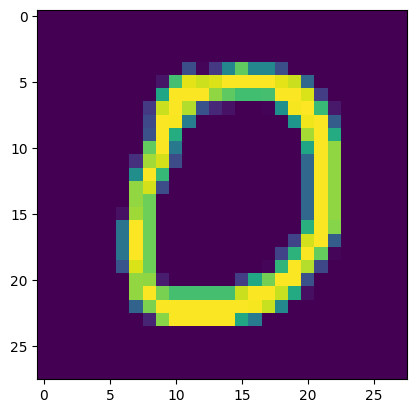

In [ ]:
x1 = x_test_normalized[10]
# Reshape from (28, 28) to (1, 784) in one step:
# 1 is the new batch dimension, -1 calculates the required size (784)
x1_reshaped = x1.reshape(1, -1)
y_pred= model.predict(x1_reshaped) 

plt.imshow(x1)

# np.argmax() takes the index of the largest value in the probability array, which directly corresponds to the predicted digit
print("True Label:", y_test[10])
print("Model Label:", np.argmax(y_pred))
